In [103]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup 
from selenium import webdriver
import requests_html
import csv

In [104]:
advanceentrieslist = pd.read_csv('AdvanceEntry.csv')
updateddf = advanceentrieslist[['uscfid', 'FIDE ID']]

In [105]:
URL = 'https://www.vegaschessfestival.com/live/results/'
page = requests.get(URL, headers={'User-Agent': 'Mozilla/5.0'})
soup = BeautifulSoup(page.content, 'lxml')

tables = soup.find_all(class_ = 'doublescroll')
string = tables[0].text
listofrows = string.split('\n')


In [106]:
first9 =listofrows[0:10]
therest = listofrows[10:100]
therealrest = listofrows[100:]

In [107]:
placement = []
title = []
name = []
federation = []
uscf_id = []
fide_rating = []
uscf_rating = []
score = []
round1 = []
round2 = []
round3 = []
round4 = []
round5 = []
round6 = []
round7 = []
round8 = []
round9 = []

for player in first9:
    placement.append(player[0:2])
    title.append(player[2:6])
    name.append(player[6:33])
    federation.append(player[33:37])
    uscf_id.append(player[37:45])
    fide_rating.append(player[46:50])
    uscf_rating.append(player[52:56])
    score.append(player[62:65])
    round1.append(player[66:70])
    round2.append(player[71:75])
    round3.append(player[76:80])
    round4.append(player[81:85])
    round5.append(player[86:90])
    round6.append(player[91:95])
    round7.append(player[96:100])
    round8.append(player[101:105])
    round9.append(player[106:110])
    
for player in therest:
    placement.append(player[0:2])
    title.append(player[3:6])
    name.append(player[6:33])
    federation.append(player[33:37])
    uscf_id.append(player[38:46])
    fide_rating.append(player[47:51])
    uscf_rating.append(player[53:57])
    score.append(player[63:66])
    round1.append(player[67:71])
    round2.append(player[72:76])
    round3.append(player[77:81])
    round4.append(player[82:86])
    round5.append(player[87:91])
    round6.append(player[92:96])
    round7.append(player[97:101])
    round8.append(player[102:106])
    round9.append(player[107:111])
    
for player in therealrest:
    placement.append(player[0:3])
    title.append(player[3:6])
    name.append(player[6:33])
    federation.append(player[33:37])
    uscf_id.append(player[39:47])
    fide_rating.append(player[48:52])
    uscf_rating.append(player[54:58])
    score.append(player[64:67])
    round1.append(player[68:72])
    round2.append(player[73:77])
    round3.append(player[78:82])
    round4.append(player[83:87])
    round5.append(player[88:92])
    round6.append(player[93:97])
    round7.append(player[98:102])
    round8.append(player[103:107])
    round9.append(player[108:112])

In [108]:
df = pd.DataFrame(list(zip(placement, title,name,federation,uscf_id,fide_rating,uscf_rating,score,round1,round2,round3 ,round4 ,round5 ,round6 ,round7 ,round8,round9 )),
               columns =['Place', 'Title', 'Name', 'Federation', 'USCF ID', 'FIDE rating', 'USCF rating', 'Score', 'Round1', 'Round2', 'Round3', 'Round4', 'Round5', 'Round6', 'Round7', 'Round8', 'Round9'])

df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)



In [109]:
uscflist = updateddf['uscfid'].tolist()
fidelist = updateddf['FIDE ID'].tolist()

newlistuscf = []
for item in uscflist:
    new = item.replace('\xa0', '')
    newlistuscf.append(new)
    
newlistfide= []

for items in fidelist:
    newz = items.replace('\xa0', '')
    newlistfide.append(newz)
    
updateddf['real uscf'] = newlistuscf
updateddf['real fide'] = newlistfide

updateddf = updateddf.drop(['uscfid', 'FIDE ID'], axis = 1)

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [110]:
joineddf = pd.merge(left=df, right=updateddf, how='left', left_on='USCF ID', right_on='real uscf')

N = 2
joineddf.drop(index=joineddf.index[-N:], 
        axis=0, 
        inplace=True)

In [111]:
birthyears = pd.read_csv('birthyearsonly.csv')
newlist = birthyears['real uscf'].tolist()
for item in range(len(newlist)):
    newlist[item] = str(newlist[item]).split(".")[0]

birthyears['USCF ID'] = newlist

In [112]:
birthyears = birthyears.drop(['real uscf', 'real fide'], axis = 1)

In [113]:
final_df = pd.merge(left=joineddf, right=birthyears, how='left', left_on='USCF ID', right_on='USCF ID')

In [114]:
final_df = final_df.drop(['real uscf', 'real fide'], axis = 1)

In [115]:
originalplaces = final_df['Place'].tolist()
fideratings = final_df['FIDE rating'].tolist()
uscfratings = final_df['USCF rating'].tolist()
for item in range(len(originalplaces)):
    originalplaces[item] = originalplaces[item].strip()
for item in range(len(fideratings)):
    fideratings[item] = fideratings[item].strip()

In [116]:
dict = {originalplaces[i]: fideratings[i] for i in range(len(originalplaces))}

In [117]:
dict.pop('84', None)
dict.pop('114', None)
dict.pop('115', None)
dict.pop('116', None)
dict.pop('118', None)
dict.pop('122', None)
dict.pop('128', None)
dict.pop('130', None)
dict.pop('131', None)
dict.pop('132', None)

''

In [118]:
finalperformances = []
for rank in range(len(final_df)):
    listofwins = []
    listofdraws = []
    listoflosses = []
    rd1 = df.iloc[rank, 8]
 

    if (rd1[0] == 'W'):
        listofwins.append(rd1[1:4])
    elif (rd1[0] == 'D'):
        listofdraws.append(rd1[1:4])
    elif (rd1[0] == 'L'):
        listoflosses.append(rd1[1:4])
        
    rd2 = df.iloc[rank, 9]

    if (rd2[0] == 'W'):
        listofwins.append(rd2[1:4])
    elif (rd2[0] == 'D'):
        listofdraws.append(rd2[1:4])
    elif (rd2[0] == 'L'):
        listoflosses.append(rd2[1:4])
        
        
        
    rd3 = df.iloc[rank, 10]

    if (rd3[0] == 'W'):
        listofwins.append(rd3[1:4])
    elif (rd3[0] == 'D'):
        listofdraws.append(rd3[1:4])
    elif (rd3[0] == 'L'):
        listoflosses.append(rd3[1:4])
        
        
        
    rd4 = df.iloc[rank, 11]
    if (rd4[0] == 'W'):
        listofwins.append(rd4[1:4])
    elif (rd4[0] == 'D'):
        listofdraws.append(rd4[1:4])
    elif (rd4[0] == 'L'):
        listoflosses.append(rd4[1:4])
        
        
        
    rd5 = df.iloc[rank, 12]
    if (rd5[0] == 'W'):
        listofwins.append(rd5[1:4])
    elif (rd5[0] == 'D'):
        listofdraws.append(rd5[1:4])
    elif (rd5[0] == 'L'):
        listoflosses.append(rd5[1:4])
        
        
        
    rd6 = df.iloc[rank, 13]
    if (rd6[0] == 'W'):
        listofwins.append(rd6[1:4])
    elif (rd6[0] == 'D'):
        listofdraws.append(rd6[1:4])
    elif (rd6[0] == 'L'):
        listoflosses.append(rd6[1:4])
        
    rd7 = df.iloc[rank, 14]
    if (rd7[0] == 'W'):
        listofwins.append(rd7[1:4])
    elif (rd7[0] == 'D'):
        listofdraws.append(rd7[1:4])
    elif (rd7[0] == 'L'):
        listoflosses.append(rd7[1:4])
        
        
    rd8 = df.iloc[rank, 15]
    if (rd8[0] == 'W'):
        listofwins.append(rd8[1:4])
    elif (rd8[0] == 'D'):
        listofdraws.append(rd8[1:4])
    elif (rd8[0] == 'L'):
        listoflosses.append(rd8[1:4])
        
        
        
    rd9 = df.iloc[rank, 16]
    if (rd9[0] == 'W'):
        listofwins.append(rd9[1:4])
    elif (rd9[0] == 'D'):
        listofdraws.append(rd9[1:4])
    elif (rd9[0] == 'L'):
        listoflosses.append(rd9[1:4])
        
    for item in range(len(listofwins)):
        listofwins[item] = listofwins[item].strip()
    for item in range(len(listofdraws)):
        listofdraws[item] = listofdraws[item].strip()
    for item in range(len(listoflosses)):
        listoflosses[item] = listoflosses[item].strip()
    
    numgamescounter = 0
    performances = []
    for item in listofwins:
        try:
            blah = int(dict[item]) + 400
            performances.append(blah)
            numgamescounter += 1
        except:
            None
    for item in listofdraws:
        try:
            blah = int(dict[item])
            performances.append(blah)
            numgamescounter += 1
        except:
            None
    for item in listoflosses:
        try:
            blah = int(dict[item]) -400
            performances.append(blah)
            numgamescounter += 1
        except:
            None
    numbersonly = []
    for item in performances:
        num = int(item)
        numbersonly.append(num)
    summation = sum(numbersonly)
    try:   
        average = summation/numgamescounter
        finalperformances.append(round(average, 1))
    except:
        finalperformances.append('UNKNOWN')
    

In [119]:
final_df['Performance Rating'] = finalperformances

In [120]:
fides = final_df['FIDE rating'].tolist()
performance = final_df['Performance Rating'].tolist()

In [121]:
performancediff = []
for i in range(len(fides)):
    try:  
        floatversion = float(fides[i])
        diff = performance[i] - floatversion
        performancediff.append(diff)
    except:
        performancediff.append('N/A')

In [122]:
final_df['Performance Difference'] = performancediff

In [123]:
#final_df.to_csv('FinalDataset.csv')
uscf_final_df = final_df

In [124]:
final_df = final_df[final_df['Performance Difference'] != 'N/A']

In [125]:
viz = final_df[['Birth Year', 'Performance Difference']]

In [149]:
performancedifference = viz['Performance Difference'].tolist()
birth1 = viz['Birth Year'].tolist()
for item in range(len(birth1)):
    birth1[item] = int(birth1[item])
    viz['Birth Year'] = birth1

C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Birth year on National Open FIDE Performance Differences')

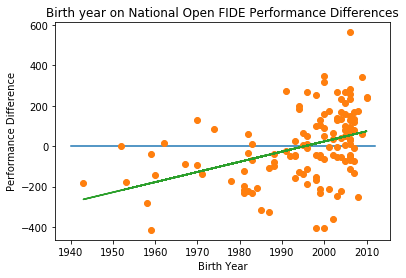

In [150]:
import matplotlib.pyplot as plt


ax1 = viz.plot.scatter(x='Birth Year',
                      y='Performance Difference',
                      c='Purple')
x_coordinates = [1940, 2012]
y_coordinates = [0, 0]

plt.plot(x_coordinates, y_coordinates)

x = np.array(birth1)

y = np.array(performancedifference)
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
ax1.set_title('Birth year on National Open FIDE Performance Differences')


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

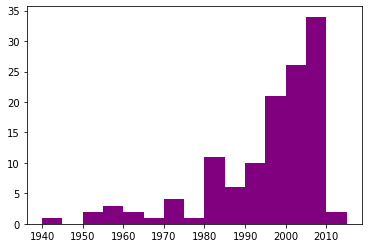

In [181]:
bin = [1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]

plt.hist(birth1, bins=bin, range=None, color = 'Purple')
#plt.set_ylabel('volts')
plt.set_title('a sine wave')

(array([10.,  4.,  6.,  6.,  8., 15.,  7.,  2.,  2.,  2.]),
 array([2000. , 2001.1, 2002.2, 2003.3, 2004.4, 2005.5, 2006.6, 2007.7,
        2008.8, 2009.9, 2011. ]),
 <a list of 10 Patch objects>)

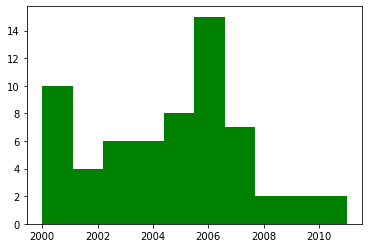

In [177]:


plt.hist(birth1, bins=10, range=(2000, 2011), color = 'Green')

In [129]:
#USCF Ratings performances
#places = final_df['Place'].tolist()
#uscfratings = final_df['USCF rating'].tolist()
for item in range(len(originalplaces)):
    originalplaces[item] = originalplaces[item].strip()
for item in range(len(uscfratings)):
    uscfratings[item] = uscfratings[item].strip()
uscfdict = {originalplaces[i]: uscfratings[i] for i in range(len(originalplaces))}

In [130]:
uscfdict

{'1': '2447',
 '2': '2776',
 '3': '2543',
 '4': '2655',
 '5': '2725',
 '6': '2628',
 '7': '2657',
 '8': '2461',
 '9': '2540',
 '10': '2721',
 '11': '2399',
 '12': '2391',
 '13': '2683',
 '14': '2734',
 '15': '2620',
 '16': '2692',
 '17': '2614',
 '18': '2467',
 '19': '2551',
 '20': '2540',
 '21': '2632',
 '22': '2630',
 '23': '2562',
 '24': '2436',
 '25': '2563',
 '26': '2672',
 '27': '2490',
 '28': '2396',
 '29': '2266',
 '30': '2430',
 '31': '2422',
 '32': '2463',
 '33': '2415',
 '34': '2544',
 '35': '2326',
 '36': '2626',
 '37': '2555',
 '38': '2466',
 '39': '2516',
 '40': '2267',
 '41': '2376',
 '42': '2427',
 '43': '2389',
 '44': '2440',
 '45': '2333',
 '46': '2216',
 '47': '2260',
 '48': '2346',
 '49': '2398',
 '50': '2157',
 '51': '2346',
 '52': '2451',
 '53': '2257',
 '54': '2392',
 '55': '2287',
 '56': '2461',
 '57': '2211',
 '58': '2501',
 '59': '2242',
 '60': '2358',
 '61': '2417',
 '62': '2297',
 '63': '2267',
 '64': '2295',
 '65': '2616',
 '66': '2337',
 '67': '2387',
 '68

In [131]:
uscfdict.pop('128', None)
uscfdict.pop('131', None)


''

In [136]:
uscffinalperformances = []
for rank in range(len(uscf_final_df)):
    listofwins = []
    listofdraws = []
    listoflosses = []
    rd1 = df.iloc[rank, 8]
 

    if (rd1[0] == 'W'):
        listofwins.append(rd1[1:4])
    elif (rd1[0] == 'D'):
        listofdraws.append(rd1[1:4])
    elif (rd1[0] == 'L'):
        listoflosses.append(rd1[1:4])
        
    rd2 = df.iloc[rank, 9]

    if (rd2[0] == 'W'):
        listofwins.append(rd2[1:4])
    elif (rd2[0] == 'D'):
        listofdraws.append(rd2[1:4])
    elif (rd2[0] == 'L'):
        listoflosses.append(rd2[1:4])
        
        
        
    rd3 = df.iloc[rank, 10]

    if (rd3[0] == 'W'):
        listofwins.append(rd3[1:4])
    elif (rd3[0] == 'D'):
        listofdraws.append(rd3[1:4])
    elif (rd3[0] == 'L'):
        listoflosses.append(rd3[1:4])
        
        
        
    rd4 = df.iloc[rank, 11]
    if (rd4[0] == 'W'):
        listofwins.append(rd4[1:4])
    elif (rd4[0] == 'D'):
        listofdraws.append(rd4[1:4])
    elif (rd4[0] == 'L'):
        listoflosses.append(rd4[1:4])
        
        
        
    rd5 = df.iloc[rank, 12]
    if (rd5[0] == 'W'):
        listofwins.append(rd5[1:4])
    elif (rd5[0] == 'D'):
        listofdraws.append(rd5[1:4])
    elif (rd5[0] == 'L'):
        listoflosses.append(rd5[1:4])
        
        
        
    rd6 = df.iloc[rank, 13]
    if (rd6[0] == 'W'):
        listofwins.append(rd6[1:4])
    elif (rd6[0] == 'D'):
        listofdraws.append(rd6[1:4])
    elif (rd6[0] == 'L'):
        listoflosses.append(rd6[1:4])
        
    rd7 = df.iloc[rank, 14]
    if (rd7[0] == 'W'):
        listofwins.append(rd7[1:4])
    elif (rd7[0] == 'D'):
        listofdraws.append(rd7[1:4])
    elif (rd7[0] == 'L'):
        listoflosses.append(rd7[1:4])
        
        
    rd8 = df.iloc[rank, 15]
    if (rd8[0] == 'W'):
        listofwins.append(rd8[1:4])
    elif (rd8[0] == 'D'):
        listofdraws.append(rd8[1:4])
    elif (rd8[0] == 'L'):
        listoflosses.append(rd8[1:4])
        
        
        
    rd9 = df.iloc[rank, 16]
    if (rd9[0] == 'W'):
        listofwins.append(rd9[1:4])
    elif (rd9[0] == 'D'):
        listofdraws.append(rd9[1:4])
    elif (rd9[0] == 'L'):
        listoflosses.append(rd9[1:4])
        
    for item in range(len(listofwins)):
        listofwins[item] = listofwins[item].strip()
    for item in range(len(listofdraws)):
        listofdraws[item] = listofdraws[item].strip()
    for item in range(len(listoflosses)):
        listoflosses[item] = listoflosses[item].strip()
    
    numgamescounter = 0
    uscfperformances = []
    for item in listofwins:
        try:
            blah = int(uscfdict[item]) + 400
            uscfperformances.append(blah)
            numgamescounter += 1
        except:
            None
    for item in listofdraws:
        try:
            blah = int(uscfdict[item])
            uscfperformances.append(blah)
            numgamescounter += 1
        except:
            None
    for item in listoflosses:
        try:
            blah = int(uscfdict[item]) -400
            uscfperformances.append(blah)
            numgamescounter += 1
        except:
            None
    numbersonly = []
    for item in uscfperformances:
        num = int(item)
        numbersonly.append(num)
    summation = sum(numbersonly)
    try:   
        average = summation/numgamescounter
        uscffinalperformances.append(round(average, 1))
    except:
        uscffinalperformances.append('UNKNOWN')
    

In [137]:
len(uscffinalperformances)

134

In [138]:
uscfs = uscf_final_df['USCF rating'].tolist()
uscf_final_df['USCF Performance Rating'] = uscffinalperformances
uscfperformance = uscf_final_df['USCF Performance Rating'].tolist()

uscfperformancediff = []
for i in range(len(uscfs)):
    try:  
        floatversion = float(uscfs[i])
        diff = uscfperformance[i] - floatversion
        uscfperformancediff.append(diff)
    except:
        uscfperformancediff.append('N/A')

In [139]:
uscf_final_df['USCF Performance Difference'] = uscfperformancediff

In [140]:
len(uscf_final_df)

134

In [141]:
uscf_final_df = uscf_final_df[uscf_final_df['USCF Performance Difference'] != 'N/A']

In [145]:
# viz2[viz2['Birth Year'] == 'UNKNOWN']

,Birth Year,USCF Performance Difference
131,UNKNOWN,314.4


In [152]:
viz2 = uscf_final_df[['Birth Year', 'USCF Performance Difference']]
viz2 = viz2[viz2['Birth Year'] != 'UNKNOWN']
uscfperformancedifference = viz2['USCF Performance Difference'].tolist()
birth2 = viz2['Birth Year'].tolist()
for item in range(len(birth2)):
    birth2[item] = int(birth2[item])
    viz2['Birth Year'] = birth2

Text(0.5, 1.0, 'Birth year on National Open USCF Performance Differences')

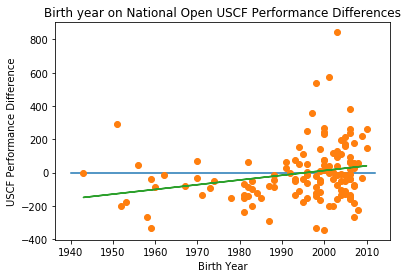

In [153]:
import matplotlib.pyplot as plt


ax1 = viz2.plot.scatter(x='Birth Year',
                      y='USCF Performance Difference',
                      c='Red')
x_coordinates = [1940, 2012]
y_coordinates = [0, 0]

plt.plot(x_coordinates, y_coordinates)

x = np.array(birth2)

y = np.array(uscfperformancedifference)
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
ax1.set_title('Birth year on National Open USCF Performance Differences')
